### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema (probar al menos 2 diferentes)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Se limpia el dataframe según las especificaciones del ejercicio
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dat = dataframe[dataframe['clase'] != 1]
dat.clase.value_counts()

# Generación de las variables necesarias para el uso de funciones sklearn
X = np.array(dat.drop(['clase'], axis=1))
y = np.array(dat['clase'])

In [43]:
# se genera el split de la muestra para obtener los conjuntos de test y train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=40)

# Se genera el modelo en función de los valores de entrenamiento
lm = linear_model.LogisticRegression(n_jobs=-1,max_iter=500)  # se genera el objeto de regresion lineal para usar todos los procesadores
lm.fit(X_train, y_train)    # se entrena el modelo


#predicción y evaluación del modelo en función de la predicción
y_test_predict = lm.predict(X_test) # valor de 'y_test_pred' predicho al insertar el valor de 'x_test'
y_predict = lm.predict(X) #Predicción general 
test_errors = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)) #medición de los errores y_test (true) vs y_test_pred (guess)
errors = np.sqrt(metrics.mean_squared_error(y, y_predict)) #medición de los errores y_test (true) vs y_test_pred (guess)
y_train_true_mean = y_train.mean()
y_true_mean = y.mean()

print ("Puntuación entrenamiento: ", lm.score(X_train, y_train))
print ("Puntuación test: ", lm.score(X_test, y_test))
print ("Puntuación general: ", lm.score(X,y))
print ("RMSE: ", test_errors)
print ("RMSE General: ", errors)
print ("Y mean: ", y_train_true_mean)
print ("Y mean General: ", y_true_mean)

Puntuación entrenamiento:  0.9615384615384616
Puntuación test:  1.0
Puntuación general:  0.9692307692307692
RMSE:  0.0
RMSE General:  0.35082320772281167
Y mean:  0.6346153846153846
Y mean General:  0.676923076923077



¿Qué acierto tiene? (score) -> el score es casi del 100% (97%)

¿Cuál es el RMSE? ¿Dirías que es un valor alto? -> el RMSE es muy bajo (cercano a 0), por lo tanto es muy buena predicción

¿Se mejora la precisión del algoritmo con dos clases? ¿por qué? Si, la precisión del modelo mejora sustancialmente; no obstante hay que destacar que se puede deber a la clase eliminada, y no a que el algoritmo mejore por tener dos clases

In [44]:
print(confusion_matrix(y, y_predict))

[[82  4]
 [ 0 44]]


<AxesSubplot:>

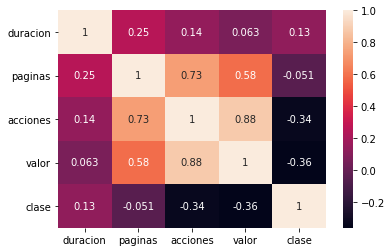

In [47]:
sns.heatmap(dat.corr(), annot = True)



Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
¿Es la regresión un buen método para este dataset?

Los resultados del modelo no tienen coherencia con la matriz de correlación ya que las variables están muy poco correlacionadas (sin embargo al habar las suficientes, se podría inferir que el modelo tiene cierta consistencia). No obstante, al probar de nuevo el código esta vez eliminando otra clase distinta a la 1, se comprueba que la mejor del modelo no se debe a tener 2 clases en vez de 3, sino a haber quitado la clase 1, por lo tanto, se puede concluir que la regresión no es un buen método para este dataset (si entendemos la clase 1 como parte del dataset)

In [48]:
# Se limpia el dataframe según las especificaciones del ejercicio
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dat = dataframe[dataframe['clase'] != 2]
dat.clase.value_counts()

# Generación de las variables necesarias para el uso de funciones sklearn
X = np.array(dat.drop(['clase'], axis=1))
y = np.array(dat['clase'])

# se genera el split de la muestra para obtener los conjuntos de test y train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=40)

# Se genera el modelo en función de los valores de entrenamiento
lm = linear_model.LogisticRegression(n_jobs=-1,max_iter=500)  # se genera el objeto de regresion lineal para usar todos los procesadores
lm.fit(X_train, y_train)    # se entrena el modelo


#predicción y evaluación del modelo en función de la predicción
y_test_predict = lm.predict(X_test) # valor de 'y_test_pred' predicho al insertar el valor de 'x_test'
y_predict = lm.predict(X) #Predicción general 

test_errors = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)) #medición de los errores y_test (true) vs y_test_pred (guess)
errors = np.sqrt(metrics.mean_squared_error(y, y_predict)) #medición de los errores y_test (true) vs y_test_pred (guess)

y_train_true_mean = y_train.mean()
y_true_mean = y.mean()

print ("Puntuación entrenamiento: ", lm.score(X_train, y_train))
print ("Puntuación test: ", lm.score(X_test, y_test))
print ("Puntuación general: ", lm.score(X,y))
print ("RMSE: ", test_errors)
print ("RMSE General: ", errors)
print ("Y mean: ", y_train_true_mean)
print ("Y mean General: ", y_true_mean)

Puntuación entrenamiento:  0.75
Puntuación test:  0.46153846153846156
Puntuación general:  0.6904761904761905
RMSE:  0.7337993857053428
RMSE General:  0.5563486402641868
Y mean:  0.27
Y mean General:  0.31746031746031744


# pruebas de los argumentos para mejora del modelo con tres clases 

tol: al aumentar el exponente, se mejora el modelo (las puntuaciones suben -para random_state='40', C=1.0-: tol=1e-4 ~ 55%%; tol=1e-6 ~ 74%); tol=1e-8 ~ 74%), sin embargo, parece tener un límite de mejora (la puntuación se bloquea en el 74%).

C: parece que con este parámetro se obtiene un punto óptimo (75.14%), ya que se mejora el modelo al variar el valor, sin embargo, esta mejoría no está relacionada con el aumentar el valor del parámetro.

se han probado también 'class_weight', 'solver' y 'multi_class' sin haber mejorado los resultados.

In [87]:
X = np.array(dataframe.drop(['clase'], axis=1)) # se elimina la columna target y se asignan los datos a un array (objeto que se necesita para la regresión logística)
y = np.array(dataframe['clase']) # la columna target se transforma en array (ídem)


# se genera el split de la muestra para obtener los conjuntos de test y train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=40)

# Se genera el modelo en función de los valores de entrenamiento
# se ajusta la tolerancia para que el modelo sea mas sensible al fallo y devuelva menos errores (con tol 1e-6 se mejora)
lm = linear_model.LogisticRegression(n_jobs=-1,tol = 1e-15, C=7.5, max_iter=1000, multi_class='multinomial') 
lm.fit(X_train, y_train)    # se entrena el modelo


#predicción y evaluación del modelo en función de la predicción
y_test_predict = lm.predict(X_test) # valor de 'y_test_pred' predicho al insertar el valor de 'x_test'
y_predict = lm.predict(X) #Predicción general 
test_errors = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)) #medición de los errores y_test (true) vs y_test_pred (guess)
errors = np.sqrt(metrics.mean_squared_error(y, y_predict)) #medición de los errores y_test (true) vs y_test_pred (guess)
y_train_true_mean = y_train.mean()
y_true_mean = y.mean()

puntuacion =  (lm.score(X_train, y_train) + lm.score(X_test, y_test) + lm.score(X, y))/3

print ("Puntuación entrenamiento: ", lm.score(X_train, y_train))
print ("Puntuación test: ", lm.score(X_test, y_test))
print ("Puntuación general: ", lm.score(X,y))
print ("Puntuación media: ", puntuacion)
print ("\n\nRMSE: ", test_errors)
print ("RMSE General: ", errors)
print ("Y mean: ", y_train_true_mean)
print ("Y mean General: ", y_true_mean)

Puntuación entrenamiento:  0.8014705882352942
Puntuación test:  0.6764705882352942
Puntuación general:  0.7764705882352941
Puntuación media:  0.7514705882352941


RMSE:  0.6416889479197478
RMSE General:  0.5739440431835514
Y mean:  0.6911764705882353
Y mean General:  0.7529411764705882
